In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

In [4]:
X = df.iloc[:100,[0,2]].values
y = df.iloc[0:100,4].values
y = np.where(y == 0, -1, 1)

In [5]:
import matplotlib.pyplot as plt

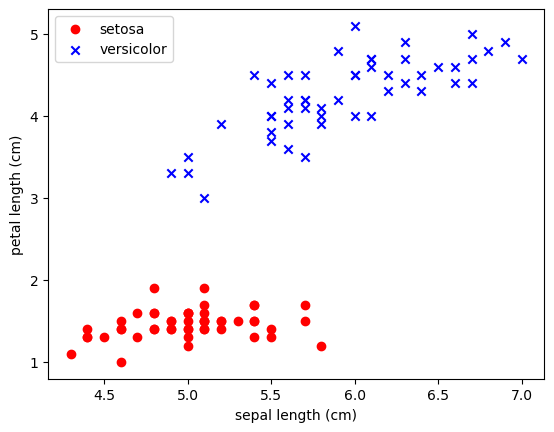

In [6]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue', marker='x',label='versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc='upper left')
plt.show()

In [7]:
# implementacja 
import random

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        #self.w_ = np.zeros(1+X.shape[1])
        
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [8]:
# uzycie jak wszsytkie klasy sklearn
ppn = Perceptron()
ppn.fit(X,y)

In [9]:
print(ppn.errors_)
print(ppn.w_)

[4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[-0.5276747286450094, -0.13037956250414545, 0.427872309715863]


In [10]:
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
ppn.predict([[5.1,3.1]])

array([1])

In [12]:
# dodatkowa funkcja

from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

# dla kwiatków

/tmp/ipykernel_5943/2939353802.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


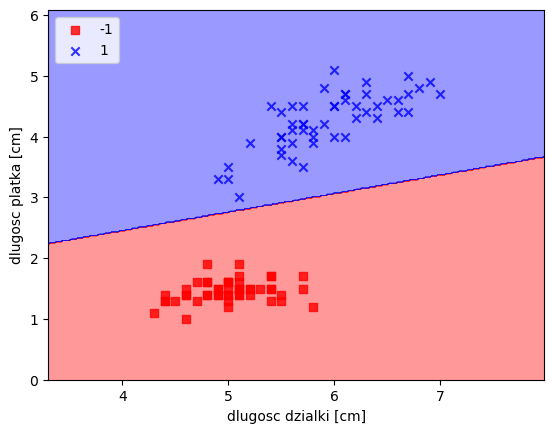

In [13]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

# SERVER FLASK 

In [14]:
import pickle

In [15]:
ppn.w_

[-0.5276747286450094, -0.13037956250414545, 0.427872309715863]

In [16]:
### Zapisz swój najlepszy model 
import pickle
with open('model.pkl', "wb") as picklefile:
    pickle.dump(ppn, picklefile)

In [17]:
with open('model.pkl',"rb") as picklefile:
    model = pickle.load(picklefile)

In [18]:
model.w_

[-0.5276747286450094, -0.13037956250414545, 0.427872309715863]

In [19]:
model.predict([[5.1,3.1]])

array([1])

In [20]:
import subprocess
import requests

In [21]:
!pip install flask

In [22]:
%%file app1.py

from flask import Flask

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/hello', methods=['GET'])
def say_hello():
    return "<b>Hello</b>"

if __name__ == '__main__':
    app.run()

Writing app1.py


In [23]:
p = subprocess.Popen(["python", "app1.py"])

In [24]:
response = requests.get("http://127.0.0.1:5000/hello")
response.content

b'<b>Hello</b>'

In [25]:
p.kill()

In [26]:
response = requests.get("http://127.0.0.1:5000/hello")
response.content

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /hello (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7ff8af647760>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [27]:
!pip install uvicorn fastapi

In [28]:
%%file app.py

from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello():
    return "<h1>hello world</h1>"

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5050)

Writing app.py


In [29]:
%%file Dockerfile
FROM python:3.10

WORKDIR /app

COPY app.py .
COPY requirements.txt .

RUN pip install -r requirements.txt

EXPOSE 5050

ENTRYPOINT ["python"]

CMD ["app.py"]

Writing Dockerfile


In [30]:
%%file requirements.txt
Flask==2.1.0

Writing requirements.txt


```bash
docker build -t test_hello .

docker run -p 5000:5000 test_hello
```

In [31]:
%%file app2.py

from flask import Flask
from flask import request

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/hello', methods=['GET'])
def say_hello():
    name = request.args.get("name", "")
    title = request.args.get("title", "")
    if name:
        resp = f"Hello {title} {name}" if title else f"Hello {name}"
    else:
        resp = f"Hello {title}" if title else "Hello"
    return resp

if __name__ == '__main__':
    app.run()

Writing app2.py


In [32]:
p = subprocess.Popen(["python", "app2.py"])

In [33]:
response = requests.get("http://127.0.0.1:5000/hello")
response.content

b'Hello'

In [34]:
response = requests.get("http://127.0.0.1:5000/hello?name=Sebastian&title=mr")
response.content

b'Hello mr Sebastian'

In [35]:
response = requests.get("http://127.0.0.1:5000/hello", params={"name": "Patryk", "title": "mr"})
response.content

b'Hello mr Patryk'

In [36]:
p.kill()

In [37]:
%%file app.py

import pickle
from math import log10

from flask import Flask
from flask import request
from flask import jsonify
import numpy as np

import random

class Perceptron():
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # self.w_ = np.zeros(1+X.shape[1])
        
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                #print(xi, target)
                update = self.eta*(target-self.predict(xi))
                #print(update)
                self.w_[1:] += update*xi
                self.w_[0] += update
                #print(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X)>=0.0,1,-1)

# Create a flask
app = Flask(__name__)

# Create an API end point
@app.route('/api/v1.0/predict', methods=['GET'])
def get_prediction():

    # sepal length
    sepal_length = float(request.args.get('sl'))
    # sepal width
    #sepal_width = float(request.args.get('sw'))
    # petal length
    petal_length = float(request.args.get('pl'))
    # petal width
    #petal_width = float(request.args.get('pw'))

    # The features of the observation to predict
    #features = [sepal_length,
    #            sepal_width,
    #            petal_length,
    #           petal_width]
    
    features = [sepal_length,
                petal_length]
    
    print(features)
    # Load pickled model file
    with open('model.pkl',"rb") as picklefile:
        model = pickle.load(picklefile)
    print(model)
    # Predict the class using the model
    predicted_class = int(model.predict(features))
    
    # Return a json object containing the features and prediction
    return jsonify(features=features, predicted_class=predicted_class)

if __name__ == '__main__':
    app.run()

Overwriting app.py


In [38]:
!head app.py


import pickle
from math import log10

from flask import Flask
from flask import request
from flask import jsonify
import numpy as np

import random


In [ ]:
!python app.py

In [ ]:
# http://127.0.0.1:5000/api/v1.0/predict?&sl=4.5&pl=1.3

# pamiętaj otworzyć nowy notebook !
import requests
response = requests.get("http://127.0.0.1:5000/api/v1.0/predict?&sl=4.5&pl=1.3")
print(response.content)